"I certify that the code and data in this assignment were generated independently, using only the tools
and resources defined in the course and that I did not receive any external help, coaching or contributions
during the production of this work."

# Please read this: Revised Codes after the Previous checkpoint
---
1. I deleted the cell using google.colab module for visualization. Instead, I use matplotlib.pyplot ax.imshow(). This is because it is inconvenient for me to work on Google colab. I failed to install it for several times. I prefer to work on my local PC. (I have tried to resolve the problem using CCR. So I consulted the person in charge but it has not been resolved in the end.) For this reason, every cell which depended on google.colab module has been changed.
2. I replace the original reward in the GridEnvironment class. This is because the rewards are too similar to each other to compare the performance of each hyperparameter setting.

# 1.1 Deterministic Environment
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import time

In [ ]:
# from google.colab import widgets
# import time

# output_grid = widgets.Grid(1, 1)
# for _ in range(5):
#     grid = np.zeros((4, 4))
#     grid[np.random.randint(4), np.random.randint(4)] = 1
#     with output_grid.output_to(0, 0):
#         output_grid.clear_cell()
#         plt.imshow(grid)
#     time.sleep(1)

In [2]:
nx, ny = 4, 4

In [3]:
threshold = -1.0

def visualize_value_function(ax,  # matplotlib axes object
                             v_pi: np.array,
                             nx: int,
                             ny: int,
                             plot_cbar = True):
    hmap = ax.imshow(v_pi.reshape(nx, ny),
                     interpolation = 'nearest')
    if plot_cbar:
        cbar = ax.figure.colorbar(hmap, ax = ax)

    # Disable x, y ticks for better visibility.
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])

In [4]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 15
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.pos_1 = [0, 3]
        self.pos_2 = [3, 0]
        self.pos_3 = [1, 2]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.pos_1)] = 0.2
        self.state[tuple(self.pos_2)] = 0.2
        self.state[tuple(self.pos_3)] = 0.5
        self.state[tuple(self.goal_pos)] = 0.7
        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        if action == 0: # down
            self.agent_pos[0] += 1
        if action == 1: # up
            self.agent_pos[0] -= 1
        if action == 2: # right
            self.agent_pos[1] += 1
        if action == 3: # left
            self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.pos_1)] = 0.2
        self.state[tuple(self.pos_2)] = 0.2
        self.state[tuple(self.pos_3)] = 0.5
        self.state[tuple(self.goal_pos)] = 0.7
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.pos_1).all():
            reward = -0.7
        if (self.agent_pos == self.pos_2).all():
            reward = 0.3
        if (self.agent_pos == self.pos_3).all():
            reward = -0.2
        if (self.agent_pos == self.goal_pos).all():
            reward = 1.0
        
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        else:
            if (self.agent_pos == self.goal_pos).all():
                done = True
            else:
                done = False
        info.update({self.timestep: (np.clip(self.agent_pos, 0, 3), reward)})
        
        return observation, reward, done, info
        
    def render(self):
        v_pi = self.state
        fig, ax = plt.subplots(1, 1, figsize = (12, 6))
        visualize_value_function(ax, v_pi, nx, ny)
        _ = ax.set_title("Value pi")

In [5]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space

    def step(self, observation):
        if counter == 0:
            return np.random.choice(self.action_space.n)
        else:
            loc = tuple(list(info.values())[-1])
            if tuple(loc[0])[0] >= 3:
                return 2
            else:
                if tuple(loc[0])[1] >= 3:
                    return 0
                else:
                    if np.random.random() > 0.5:
                        return 2
                    else:
                        return 0

In the step 1, the location is (0, 0) and the reward is 0.
0
In the step 2, the location is (1, 0) and the reward is 0.
0
In the step 3, the location is (2, 0) and the reward is 0.
0
In the step 4, the location is (3, 0) and the reward is 0.3.
0.3
In the step 5, the location is (3, 1) and the reward is 0.
0.3
In the step 6, the location is (3, 2) and the reward is 0.
0.3
In the step 7, the location is (3, 3) and the reward is 1.0.
1.3
The total reward is 1.3.


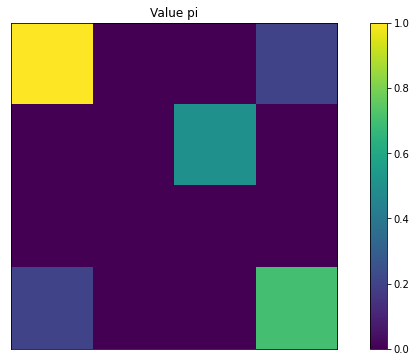

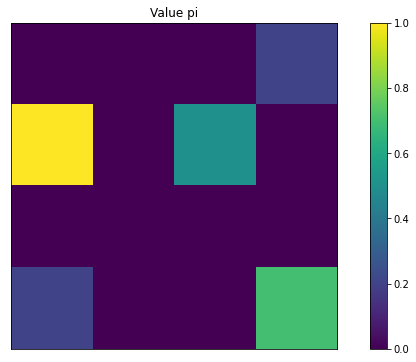

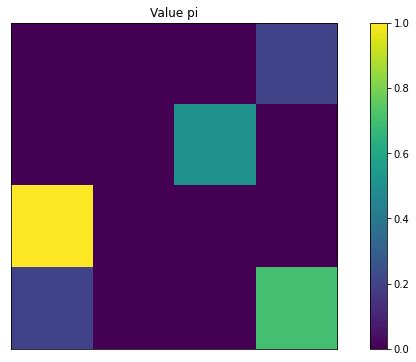

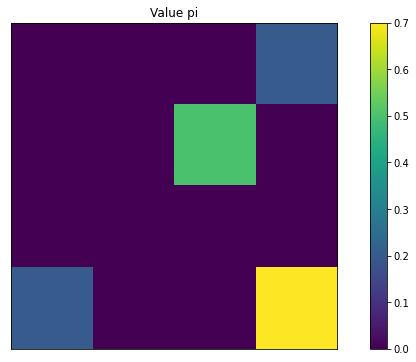

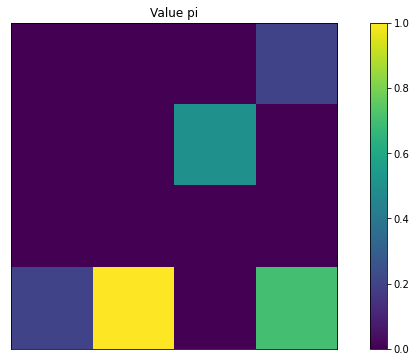

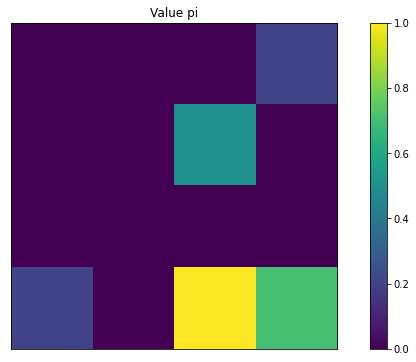

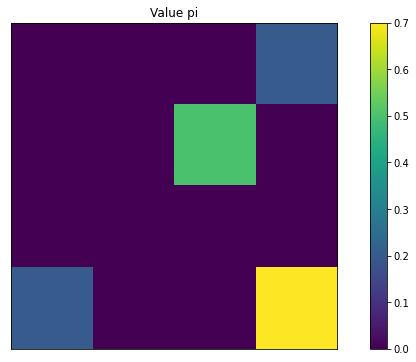

In [6]:
env = GridEnvironment()
agent = RandomAgent(env)
info = {}
counter = 0
R = 0

obs = env.reset()
done = False

# output_grid = widgets.Grid(1, 1)
# with output_grid.output_to(0, 0):
#     env.render()

while not done:
    action = agent.step(obs)
    obs, reward, done, info = env.step(action)
    R += reward
    print(f'In the step {list(info.keys())[-1]}, the location is {tuple(tuple(list(info.values())[-1])[0])} and the reward is {list(info.values())[-1][1]}.')
    print(R)
    counter += 1
    
#     with output_grid.output_to(0, 0):
#         output_grid.clear_cell()
    env.render()
    time.sleep(1)

print(f'The total reward is {R}.')

# 1.2 Stochastic Environment
---

In [7]:
class GridEnvironment_Stochastic(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 15
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.pos_1 = [0, 3]
        self.pos_2 = [3, 0]
        self.pos_3 = [1, 2]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.pos_1)] = 0.2
        self.state[tuple(self.pos_2)] = 0.2
        self.state[tuple(self.pos_3)] = 0.5
        self.state[tuple(self.goal_pos)] = 0.7
        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        p = np.random.random()
        if action == 0: # down
            if p < 0.85:
                self.agent_pos[0] += 1
            elif p < 0.9:
                self.agent_pos[0] -= 1
            elif p < 0.95:
                self.agent_pos[1] += 1
            else:
                self.agent_pos[1] -= 1
        if action == 1: # up
            if p < 0.85:
                self.agent_pos[0] -= 1
            elif p < 0.9:
                self.agent_pos[0] += 1
            elif p < 0.95:
                self.agent_pos[1] += 1
            else:
                self.agent_pos[1] -= 1
        if action == 2: # right
            if p < 0.85:
                self.agent_pos[1] += 1
            elif p < 0.9:
                self.agent_pos[0] += 1
            elif p < 0.95:
                self.agent_pos[0] -= 1
            else:
                self.agent_pos[1] -= 1
        if action == 3: # left
            if p < 0.85:
                self.agent_pos[1] -= 1
            elif p < 0.9:
                self.agent_pos[0] == 1
            elif p < 0.95:
                self.agent_pos[0] -= 1
            else:
                self.agent_pos[1] += 1

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.pos_1)] = 0.2
        self.state[tuple(self.pos_2)] = 0.2
        self.state[tuple(self.pos_3)] = 0.5
        self.state[tuple(self.goal_pos)] = 0.7
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.pos_1).all():
            reward = -0.7
        if (self.agent_pos == self.pos_2).all():
            reward = 0.3
        if (self.agent_pos == self.pos_3).all():
            reward = -0.2
        if (self.agent_pos == self.goal_pos).all():
            reward = 1.0
        
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        else:
            if (self.agent_pos == self.goal_pos).all():
                done = True
            else:
                done = False
        info.update({self.timestep: (np.clip(self.agent_pos, 0, 3), reward)})
        
        return observation, reward, done, info
        
    def render(self):
        #plt.imshow(self.state)
        v_pi = self.state
        fig, ax = plt.subplots(1, 1, figsize = (12, 6))
        visualize_value_function(ax, v_pi, nx, ny)
        _ = ax.set_title("Value pi")

In the step 1, the location is (0, 0) and the reward is 0.
0
In the step 2, the location is (1, 0) and the reward is 0.
0
In the step 3, the location is (2, 0) and the reward is 0.
0
In the step 4, the location is (3, 0) and the reward is 0.3.
0.3
In the step 5, the location is (3, 0) and the reward is 0.3.
0.6
In the step 6, the location is (3, 1) and the reward is 0.
0.6
In the step 7, the location is (3, 2) and the reward is 0.
0.6
In the step 8, the location is (3, 3) and the reward is 1.0.
1.6
The total reward is 1.6.


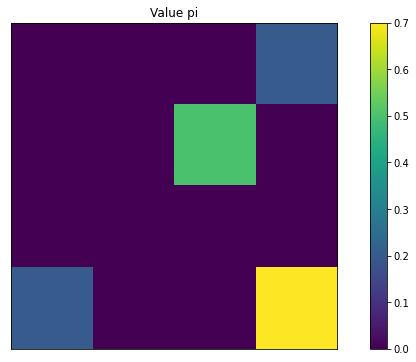

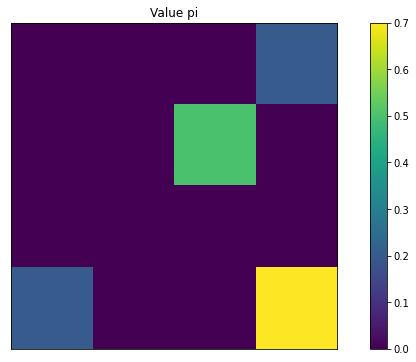

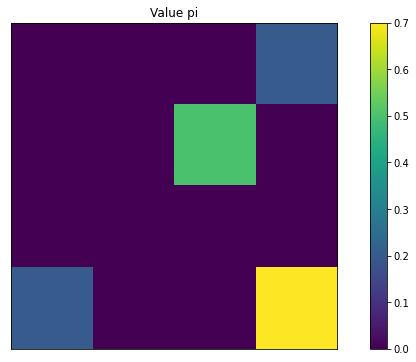

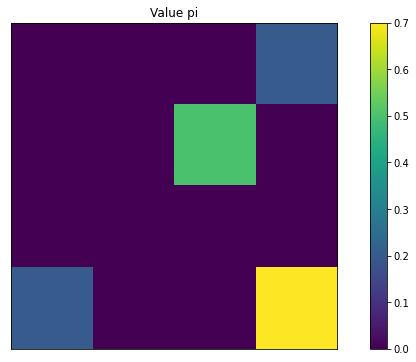

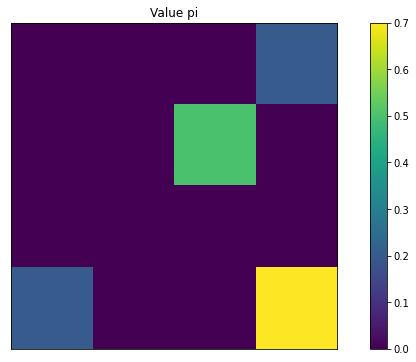

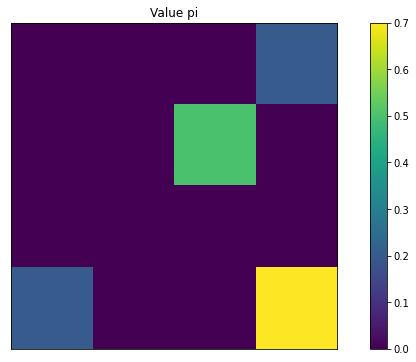

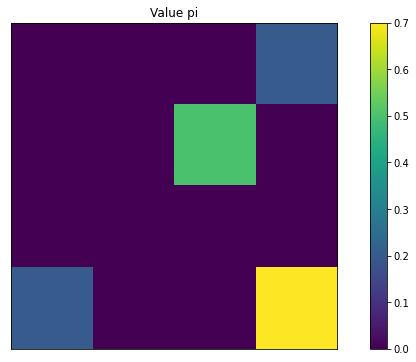

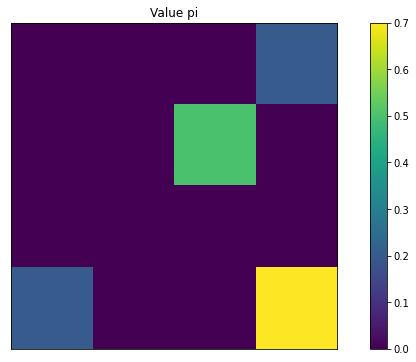

In [8]:
env_stochastic = GridEnvironment_Stochastic()
agent_stochastic = RandomAgent(env_stochastic)
info = {}
counter = 0
R = 0

obs = env_stochastic.reset()
done = False

# output_grid = widgets.Grid(1, 1)
# with output_grid.output_to(0, 0):
#     env_stochastic.render()


while not done:
    action = agent_stochastic.step(obs)
    obs, reward, done, info = env_stochastic.step(action)
    R += reward
    #print(info)
    print(f'In the step {list(info.keys())[-1]}, the location is {tuple(tuple(list(info.values())[-1])[0])} and the reward is {list(info.values())[-1][1]}.')
    print(R)
    counter += 1
    
#     with output_grid.output_to(0, 0):
#         output_grid.clear_cell()
#         env_stochastic.render()
    env.render()
    time.sleep(1)

print(f'The total reward is {R}.')

"I certify that the code and data in this assignment were generated independently, using only the tools
and resources defined in the course and that I did not receive any external help, coaching or contributions
during the production of this work."

# Part 2: Applying tabular methods
---

## 1-1. Applying Q-learning to solve the deterministic environment

Since Q-learning is a special form of Time Difference Learning, first instantiate Time Difference agent. And implement Q-learning agent in the form of inheriting the Time Difference agent.

In [9]:
# Constructor for Time Difference Agent
class TDAgent:
    def __init__(self,
                 gamma: float,
                 num_states: int,
                 num_actions: int,
                 eps: float, # the parameter for epsilon-greedy policy
                 lr: float, # learning rate
                 factor: float, # decaying factor
                 num_steps: int):
        self.gamma = gamma
        self.num_states = num_states
        self.num_actions = num_actions
        self.lr = lr
        self.eps = eps
        self.factor = factor
        self.num_steps = num_steps

        # Initialize state value function, 'V', and
        # action value function, 'Q'.
        self.v = None
        self.q = None
        self.reset_values()
        
        # Initialize "policy Q".
        # "policy Q" is the one used for policy generation.
        self._policy_q = None
        self.reset_policy()

    def reset_values(self):
        self.v = np.zeros(shape = self.num_states)
        self.q = np.zeros(shape = (self.num_states, self.num_actions))

    def reset_policy(self):
        self._policy_q = np.zeros(shape = (self.num_states, self.num_actions))

    def get_action(self, state):
        prob = np.random.uniform(0.0, 1.0, 1)
        self.eps *= self.factor
        # epsilon-greedy policy over Q
        if prob <= self.eps: # random policy
            action = np.random.choice(range(self.num_actions))
        else:  # greedy policy
            action = self._policy_q[state, :].argmax()
        return action

In [10]:
class QLearner(TDAgent):
    # All arguments except for the number of steps in TDAgent exist here.
    def __init__(self,
                 gamma: float,
                 num_states: int,
                 num_actions: int,
                 eps: float,
                 lr: float,
                 factor: float):
        # Inherit TDAgent.
        super(QLearner, self).__init__(gamma = gamma,
                                       num_states = num_states,
                                       num_actions = num_actions,
                                       eps = eps,
                                       lr = lr,
                                       factor = factor,
                                       # Set this consistent with TD(n).
                                       # In this case, TD(0).
                                       num_steps = 1)

    def get_action(self, state):
        prob = np.random.uniform(0.0, 1.0, 1)
        # decaying epsilon
        self.eps *= self.factor
        # e-greedy policy over Q
        if prob <= self.eps: # random policy
            action = np.random.choice(range(self.num_actions))
        else: # greedy policy
            action = self.q[state, :].argmax()
        return action

    def update_sample(self, state, action, reward, next_state, done):
        s, a, r, ns = state, action, reward, next_state
        # Q-Learning target
        td_target = r + self.gamma * self.q[ns, :].max() * (1 - done)
        self.q[s, a] += self.lr * (td_target - self.q[s, a])

In [13]:
# I computed rewards when 'repeats' = 100
# to reduce variance of rewards so that I can compare
# different hyperparameter settings more precisely.
# However, it takes about 1 minute for this cell.
# For this reason, I set 'repeats' = 10 for your convenience.
repeats = 10
num_episodes = 100
report_every = 10
iter_idx = []
iter_idx2 = []
qlearning_rewards_cum = []
qlearning_rewards_avg = []
qlearning_decaying_eps = []
for e in range(9):
    empty = [0] * num_episodes
    qlearning_rewards_cum.append(empty)
    qlearning_rewards_avg.append([])
    qlearning_decaying_eps.append([])

# for hyperparameter tuning (gamma and decaying factor)
for l in range(repeats): # averaging 10 repeated trials
                         # to reduce variance of rewards
    
    qlearning_rewards = []
    for e in range(9):
        qlearning_rewards.append([])    
    
    count = 0
    for k in range(3):
        gamma = 0.99 - (k * 0.02)
        for j in range(3):
            # decay factor = (Final eps / Initial eps)^(1 / number of episodes)
            # decay factor = (0.01 / 1)^(1 / 100) = 0.955
            factor = 0.955 - (j * 0.02)
            
            qlearning_agent = QLearner(gamma = gamma,
                        num_states = env.observation_space.n,
                        num_actions = env.action_space.n,
                        eps = 1.0,
                        lr = 1e-1,
                        factor = factor)

            for i in range(num_episodes):

                reward_sum = 0
                env.reset()    
                while True:
                    state = env.agent_pos[0] * 4 + env.agent_pos[1]
                    action = qlearning_agent.get_action(state)
                    obs, reward, done, info = env.step(action)
                    next_state = env.agent_pos[0] * 4 + env.agent_pos[1]

                    qlearning_agent.update_sample(state = state,
                                              action = action,
                                              reward = reward,
                                              next_state = next_state,
                                              done = done)
                    reward_sum += reward
                    if done:
                        break
                    
                qlearning_rewards[count].append(reward_sum)
                if l == 0:
                    qlearning_decaying_eps[count].append(qlearning_agent.eps)
                    if k + j == 0:
                        iter_idx.append(i)                

#                 if i % report_every == 0:
#                     print(f"Running {i} th episode for gamma {gamma} and factor {factor}")
#                     print(f"Reward sum : {reward_sum}")

            if l == 0:
                print(f"The {count + 1}th combination: gamma {gamma} and factor {factor}")
            count += 1
    
    for z in range(9):
        qlearning_rewards_cum[z] = [
            r_cum + r_new for r_cum, r_new in zip(qlearning_rewards_cum[z],
                                                  qlearning_rewards[z])
            ]

for y in range(9):
    qlearning_rewards_avg[y] = [x / repeats for x in qlearning_rewards_cum[y]]

The 1th combination: gamma 0.99 and factor 0.955
The 2th combination: gamma 0.99 and factor 0.9349999999999999
The 3th combination: gamma 0.99 and factor 0.9149999999999999
The 4th combination: gamma 0.97 and factor 0.955
The 5th combination: gamma 0.97 and factor 0.9349999999999999
The 6th combination: gamma 0.97 and factor 0.9149999999999999
The 7th combination: gamma 0.95 and factor 0.955
The 8th combination: gamma 0.95 and factor 0.9349999999999999
The 9th combination: gamma 0.95 and factor 0.9149999999999999


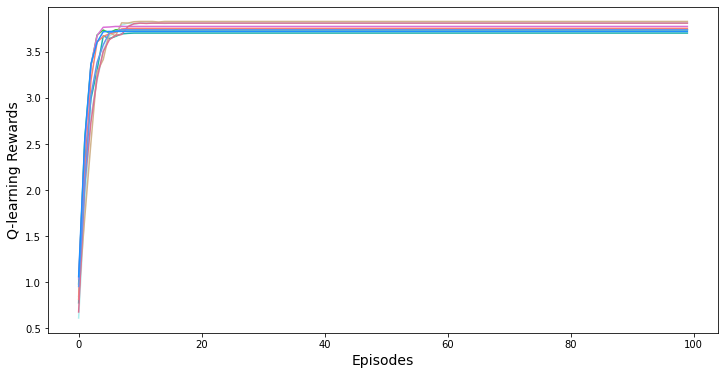

In [22]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(iter_idx, qlearning_rewards_avg[0], color = "paleturquoise")
ax.plot(iter_idx, qlearning_rewards_avg[1], color = "lightseagreen")
ax.plot(iter_idx, qlearning_rewards_avg[2], color = "limegreen")
ax.plot(iter_idx, qlearning_rewards_avg[3], color = "tan")
ax.plot(iter_idx, qlearning_rewards_avg[4], color = "salmon")
ax.plot(iter_idx, qlearning_rewards_avg[5], color = "orchid")
ax.plot(iter_idx, qlearning_rewards_avg[6], color = "palevioletred")
ax.plot(iter_idx, qlearning_rewards_avg[7], color = "cornflowerblue")
ax.plot(iter_idx, qlearning_rewards_avg[8], color = "dodgerblue")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Q-learning Rewards", color = "black", fontsize = 14)
plt.show()

The best setting for the `Q-learning` in the `deterministic` envrionment
- gamma: 0.97
- decaying factor: 0.955

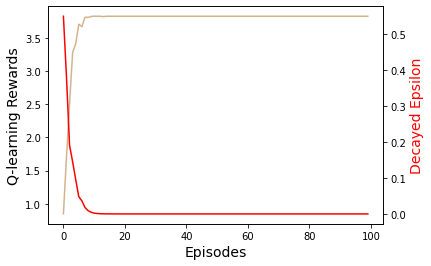

In [23]:
# the best (the highest rewards) case when 'repeats' = 100
# not the fastest but quickly converges..
fig, ax = plt.subplots()
# gamma = 0.99, factor = 0.955
ax.plot(iter_idx, qlearning_rewards_avg[3], color = "tan")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Q-learning Rewards", color = "black", fontsize = 14)
ax2 = ax.twinx()
ax2.plot(iter_idx, qlearning_decaying_eps[3], color = "red")
ax2.set_ylabel("Decayed Epsilon", color = "red", fontsize = 14)
plt.show()

Only greedy policy

In [24]:
optimal_q_qlearning = qlearning_agent._policy_q

class GreedyTDAgent:
    def __init__(self,
                 gamma: float,
                 num_states: int,
                 num_actions: int,
                 lr: float, # learning rate
                 num_steps: int):
        self.gamma = gamma
        self.num_states = num_states
        self.num_actions = num_actions
        self.lr = lr
        self.num_steps = num_steps

        # Initialize state value function, 'V', and
        # action value function, 'Q'.
        self.v = None
        self.q = None
        self.reset_values()
        
        # Initialize "policy Q".
        # "policy Q" is the one used for policy generation.
        self._policy_q = optimal_q_qlearning

    def reset_values(self):
        self.v = np.zeros(shape = self.num_states)
        self.q = np.zeros(shape = (self.num_states, self.num_actions))

    def get_action(self, state):
        action = self._policy_q[state, :].argmax()
        return action

In [25]:
class GreedyQLearner(GreedyTDAgent):
    # All arguments except for the number of steps in TDAgent exist here.
    def __init__(self,
                 gamma: float,
                 num_states: int,
                 num_actions: int,
                 lr: float):
        # Inherit TDAgent.
        super(GreedyQLearner, self).__init__(gamma = gamma,
                                             num_states = num_states,
                                             num_actions = num_actions,
                                             lr = lr,
                                             # Set this consistent with TD(n).
                                             # In this case, TD(0).
                                             num_steps = 1)

    def get_action(self, state):
        action = self.q[state, :].argmax()
        return action

    def update_sample(self, state, action, reward, next_state, done):
        s, a, r, ns = state, action, reward, next_state
        # Q-Learning target
        td_target = r + self.gamma * self.q[ns, :].max() * (1 - done)
        self.q[s, a] += self.lr * (td_target - self.q[s, a])

In [26]:
num_episode = 100
iter_idx = []
greedy_qlearning_rewards = []

greedy_qlearning_agent = GreedyQLearner(gamma = gamma,
                                        num_states = env.observation_space.n,
                                        num_actions = env.action_space.n,
                                        lr = 1e-1)

for i in range(num_episodes):

    reward_sum = 0
    env.reset()    
    while True:
        state = env.agent_pos[0] * 4 + env.agent_pos[1]
        action = greedy_qlearning_agent.get_action(state)
        obs, reward, done, info = env.step(action)
        next_state = env.agent_pos[0] * 4 + env.agent_pos[1]

        greedy_qlearning_agent.update_sample(state = state,
                                             action = action,
                                             reward = reward,
                                             next_state = next_state,
                                             done = done)
        reward_sum += reward
        if done:
            break
                    
    greedy_qlearning_rewards.append(reward_sum)
    iter_idx.append(i)                

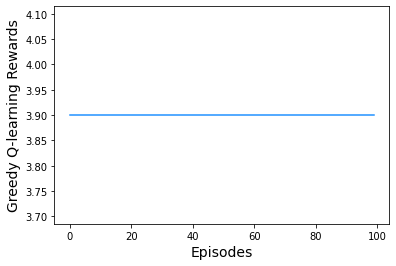

In [27]:
fig, ax = plt.subplots()
ax.plot(iter_idx, greedy_qlearning_rewards, color = "dodgerblue")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Greedy Q-learning Rewards", color = "black", fontsize = 14)
plt.show()

## 1-2. Applying Q-learning to solve the stochastic environment

In [73]:
repeats = 10
num_episodes = 100
report_every = 10
iter_idx = []
iter_idx2 = []
stoch_qlearning_rewards_cum = []
stoch_qlearning_rewards_avg = []
qlearning_decaying_eps = []
for e in range(9):
    empty = [0] * num_episodes
    stoch_qlearning_rewards_cum.append(empty)
    stoch_qlearning_rewards_avg.append([])
    qlearning_decaying_eps.append([])

# for hyperparameter tuning (gamma and decaying factor)
for l in range(repeats): # averaging 10 repeated trials
                         # to reduce variance of rewards
    
    stoch_qlearning_rewards = []
    for e in range(9):
        stoch_qlearning_rewards.append([])    
    
    count = 0
    for k in range(3):
        gamma = 0.99 - (k * 0.02)
        for j in range(3):
            # decay factor = (Final eps / Initial eps)^(1 / number of episodes)
            # decay factor = (0.01 / 1)^(1 / 100) = 0.955
            factor = 0.955 - (j * 0.02)
            
            qlearning_agent = QLearner(gamma = gamma,
                        num_states = env_stochastic.observation_space.n,
                        num_actions = env_stochastic.action_space.n,
                        eps = 1.0,
                        lr = 1e-1,
                        factor = factor)

            for i in range(num_episodes):

                reward_sum = 0
                env_stochastic.reset()    
                while True:
                    state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
                    action = qlearning_agent.get_action(state)
                    obs, reward, done, info = env_stochastic.step(action)
                    next_state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]

                    qlearning_agent.update_sample(state = state,
                                              action = action,
                                              reward = reward,
                                              next_state = next_state,
                                              done = done)
                    reward_sum += reward
                    if done:
                        break
                    
                stoch_qlearning_rewards[count].append(reward_sum)
                if l == 0:
                    qlearning_decaying_eps[count].append(qlearning_agent.eps)
                    if k + j == 0:
                        iter_idx.append(i)                

#                 if i % report_every == 0:
#                     print(f"Running {i} th episode for gamma {gamma} and factor {factor}")
#                     print(f"Reward sum : {reward_sum}")

            if l == 0:
                print(f"The {count + 1}th combination: gamma {gamma} and factor {factor}")
            count += 1
    
    for z in range(9):
        stoch_qlearning_rewards_cum[z] = [
            r_cum + r_new for r_cum, r_new in zip(stoch_qlearning_rewards_cum[z],
                                                  stoch_qlearning_rewards[z])
            ]

for y in range(9):
    stoch_qlearning_rewards_avg[y] = [x / repeats for x in stoch_qlearning_rewards_cum[y]]

The 1th combination: gamma 0.99 and factor 0.955
The 2th combination: gamma 0.99 and factor 0.9349999999999999
The 3th combination: gamma 0.99 and factor 0.9149999999999999
The 4th combination: gamma 0.97 and factor 0.955
The 5th combination: gamma 0.97 and factor 0.9349999999999999
The 6th combination: gamma 0.97 and factor 0.9149999999999999
The 7th combination: gamma 0.95 and factor 0.955
The 8th combination: gamma 0.95 and factor 0.9349999999999999
The 9th combination: gamma 0.95 and factor 0.9149999999999999


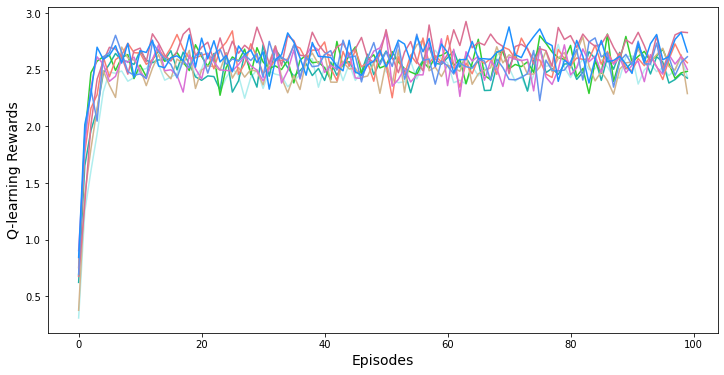

In [74]:
# For the stochastic environment,
# there does not seem to be significant differences among various settings.
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(iter_idx, stoch_qlearning_rewards_avg[0], color = "paleturquoise")
ax.plot(iter_idx, stoch_qlearning_rewards_avg[1], color = "lightseagreen")
ax.plot(iter_idx, stoch_qlearning_rewards_avg[2], color = "limegreen")
ax.plot(iter_idx, stoch_qlearning_rewards_avg[3], color = "tan")
ax.plot(iter_idx, stoch_qlearning_rewards_avg[4], color = "salmon")
ax.plot(iter_idx, stoch_qlearning_rewards_avg[5], color = "orchid")
ax.plot(iter_idx, stoch_qlearning_rewards_avg[6], color = "palevioletred")
ax.plot(iter_idx, stoch_qlearning_rewards_avg[7], color = "cornflowerblue")
ax.plot(iter_idx, stoch_qlearning_rewards_avg[8], color = "dodgerblue")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Q-learning Rewards", color = "black", fontsize = 14)
plt.show()

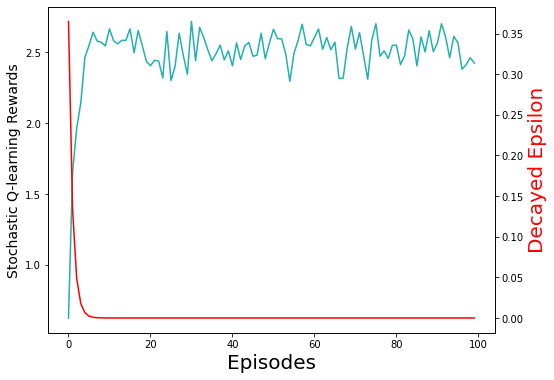

In [76]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(iter_idx, stoch_qlearning_rewards_avg[1], color = "lightseagreen")
ax2 = ax.twinx()
ax2.plot(iter_idx, qlearning_decaying_eps[1], color = "red")
ax.set_xlabel("Episodes", fontsize = 20)
ax.set_ylabel("Stochastic Q-learning Rewards", color = "black", fontsize = 14)
ax2.set_ylabel("Decayed Epsilon", color = "red", fontsize = 20)
plt.show()

In [30]:
num_episode = 100
iter_idx = []
stoch_greedy_qlearning_rewards = []

stoch_greedy_qlearning_agent = GreedyQLearner(gamma = gamma,
                                             num_states = env_stochastic.observation_space.n,
                                             num_actions = env_stochastic.action_space.n,
                                             lr = 1e-1)

for i in range(num_episodes):

    reward_sum = 0
    env_stochastic.reset()    
    while True:
        state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
        action = greedy_qlearning_agent.get_action(state)
        obs, reward, done, info = env_stochastic.step(action)
        next_state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
        
        greedy_qlearning_agent.update_sample(state = state,
                                             action = action,
                                             reward = reward,
                                             next_state = next_state,
                                             done = done)
        reward_sum += reward
        if done:
            break
                    
    stoch_greedy_qlearning_rewards.append(reward_sum)
    iter_idx.append(i)                

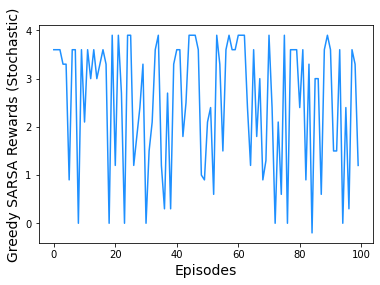

In [31]:
fig, ax = plt.subplots()
ax.plot(iter_idx, stoch_greedy_qlearning_rewards, color = "dodgerblue")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Greedy SARSA Rewards (Stochastic)", color = "black", fontsize = 14)
plt.show()

## 1-3. Applying SARSA to solve the deterministic environment

As in the case of Q-learning, implement SARSA agent in the form of inheriting the Time Difference agent.

In [32]:
class SARSA(TDAgent):
    # All arguments except for the number of steps in TDAgent exist here.
    def __init__(self,
                 gamma: float,
                 num_states: int,
                 num_actions: int,
                 eps: float,
                 lr: float,
                 factor: float):
        # Inherit TDAgent.
        super(SARSA, self).__init__(gamma = gamma,
                                    num_states = num_states,
                                    num_actions = num_actions,
                                    eps = eps,
                                    # Set this consistent with TD(n).
                                    # In this case, TD(0).
                                    lr = lr,
                                    factor = factor,
                                    num_steps = 1)

    def get_action(self, state):
        prob = np.random.uniform(0.0, 1.0, 1)
        self.eps *= self.factor
        # e-greedy policy over Q
        if prob <= self.eps: # random policy
            action = np.random.choice(range(self.num_actions))
        else: # greedy policy
            action = self.q[state, :].argmax()
        return action

    def update_sample(self, state, action, reward, next_state, next_action, done):
        s, a, r, ns, na = state, action, reward, next_state, next_action

        # SARSA target
        td_target = r + self.gamma * self.q[ns, na] * (1 - done)
        self.q[s, a] += self.lr * (td_target - self.q[s, a])

In [67]:
repeats = 10
num_episodes = 100
report_every = 5
iter_idx = []
iter_idx2 = []
sarsa_rewards_cum = []
sarsa_rewards_avg = []
sarsa_decaying_eps = []
for e in range(9):
    empty = [0] * num_episodes
    sarsa_rewards_cum.append(empty)
    sarsa_rewards_avg.append([])
    sarsa_decaying_eps.append([])

# for hyperparameter tuning (gamma and decaying factor)
for l in range(repeats): # averaging 10 repeated trials
                         # to reduce variance of rewards
    
    sarsa_rewards = []
    for e in range(9):
        sarsa_rewards.append([])    
    
    count = 0
    for k in range(3):
        gamma = 0.99 - (k * 0.02)
        for j in range(3):
            factor = 0.955 - (j * 0.02)
            
            sarsa_agent = SARSA(gamma = gamma,
                        num_states = env.observation_space.n,
                        num_actions = env.action_space.n,
                        eps = 1.0,
                        lr = 1e-1,
                        factor = factor)

            for i in range(num_episodes):

                reward_sum = 0
                env.reset()    
                while True:
                    state = env.agent_pos[0] * 4 + env.agent_pos[1]
                    action = sarsa_agent.get_action(state)
                    obs, reward, done, info = env.step(action)
                    next_state = env.agent_pos[0] * 4 + env.agent_pos[1]
                    next_action = sarsa_agent.get_action(next_state)

                    sarsa_agent.update_sample(state = state,
                                              action = action,
                                              reward = reward,
                                              next_state = next_state,
                                              next_action = next_action,
                                              done = done)
                    reward_sum += reward
                    if done:
                        break
                    
                sarsa_rewards[count].append(reward_sum)
                if l == 0:
                    sarsa_decaying_eps[count].append(sarsa_agent.eps)
                    if k + j == 0:
                        iter_idx.append(i)                

#                 if i % report_every == 0:
#                     print(f"Running {i} th episode for gamma {gamma} and factor {factor}")
#                     print(f"Reward sum : {reward_sum}")

            if l == 0:
                print(f"The {count + 1}th combination: gamma {gamma} and factor {factor}")
            count += 1
    
    for z in range(9):
        sarsa_rewards_cum[z] = [
            r_cum + r_new for r_cum, r_new in zip(sarsa_rewards_cum[z],
                                                  sarsa_rewards[z])
            ]

for y in range(9):
    sarsa_rewards_avg[y] = [x / repeats for x in sarsa_rewards_cum[y]]

The 1th combination: gamma 0.99 and factor 0.955
The 2th combination: gamma 0.99 and factor 0.9349999999999999
The 3th combination: gamma 0.99 and factor 0.9149999999999999
The 4th combination: gamma 0.97 and factor 0.955
The 5th combination: gamma 0.97 and factor 0.9349999999999999
The 6th combination: gamma 0.97 and factor 0.9149999999999999
The 7th combination: gamma 0.95 and factor 0.955
The 8th combination: gamma 0.95 and factor 0.9349999999999999
The 9th combination: gamma 0.95 and factor 0.9149999999999999


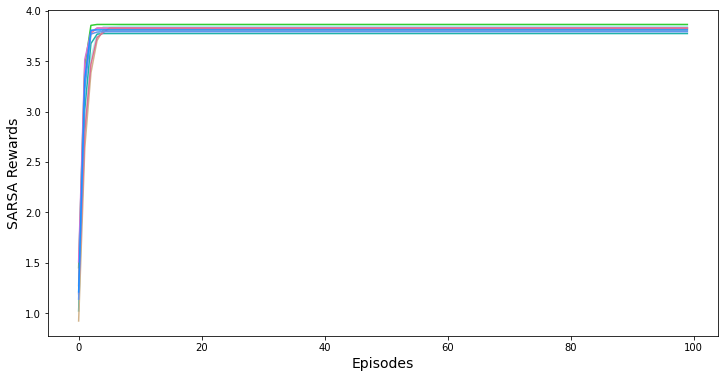

In [68]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(iter_idx, sarsa_rewards_avg[0], color = "paleturquoise")
ax.plot(iter_idx, sarsa_rewards_avg[1], color = "lightseagreen")
ax.plot(iter_idx, sarsa_rewards_avg[2], color = "limegreen")
ax.plot(iter_idx, sarsa_rewards_avg[3], color = "tan")
ax.plot(iter_idx, sarsa_rewards_avg[4], color = "salmon")
ax.plot(iter_idx, sarsa_rewards_avg[5], color = "orchid")
ax.plot(iter_idx, sarsa_rewards_avg[6], color = "palevioletred")
ax.plot(iter_idx, sarsa_rewards_avg[7], color = "cornflowerblue")
ax.plot(iter_idx, sarsa_rewards_avg[8], color = "dodgerblue")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("SARSA Rewards", color = "black", fontsize = 14)
plt.show()

The best setting for the `SARSA` in the `deterministic` envrionment
- gamma: 0.95
- decaying factor: 0.955

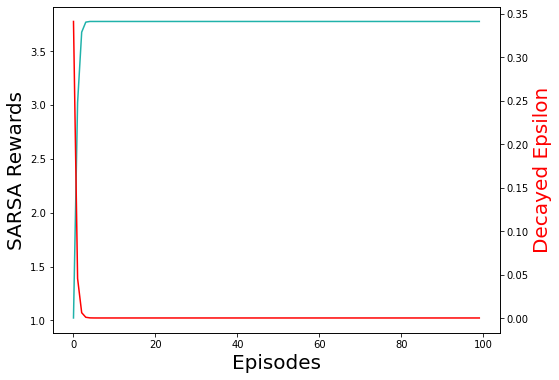

In [70]:
# the best case (not the fastest but quickly converges)
fig, ax = plt.subplots(figsize = (8, 6))
# gamma = 0.95, factor = 0.955
ax.plot(iter_idx, sarsa_rewards_avg[1], color = "lightseagreen")
ax.set_xlabel("Episodes", fontsize = 20)
ax.set_ylabel("SARSA Rewards", color = "black", fontsize = 20)
ax2 = ax.twinx()
ax2.plot(iter_idx, sarsa_decaying_eps[1], color = "red")
ax2.set_ylabel("Decayed Epsilon", color = "red", fontsize = 20)
plt.show()

Only greedy policy

In [45]:
optimal_q_sarsa = sarsa_agent._policy_q

class GreedyTDAgent:
    def __init__(self,
                 gamma: float,
                 num_states: int,
                 num_actions: int,
                 lr: float, # learning rate
                 num_steps: int):
        self.gamma = gamma
        self.num_states = num_states
        self.num_actions = num_actions
        self.lr = lr
        self.num_steps = num_steps

        # Initialize state value function, 'V', and
        # action value function, 'Q'.
        self.v = None
        self.q = None
        self.reset_values()
        
        # Initialize "policy Q".
        # "policy Q" is the one used for policy generation.
        self._policy_q = optimal_q_sarsa

    def reset_values(self):
        self.v = np.zeros(shape = self.num_states)
        self.q = np.zeros(shape = (self.num_states, self.num_actions))

    def get_action(self, state):
        action = self._policy_q[state, :].argmax()
        return action

In [46]:
class GreedySARSA(GreedyTDAgent):
    # All arguments except for the number of steps in TDAgent exist here.
    def __init__(self,
                 gamma: float,
                 num_states: int,
                 num_actions: int,
                 lr: float):
        # Inherit TDAgent.
        super(GreedySARSA, self).__init__(gamma = gamma,
                                          num_states = num_states,
                                          num_actions = num_actions,
                                          lr = lr,
                                          # Set this consistent with TD(n).
                                          # In this case, TD(0).                                          
                                          num_steps = 1)

    def get_action(self, state):
        action = self.q[state, :].argmax()
        return action

    def update_sample(self, state, action, reward, next_state, next_action, done):
        s, a, r, ns, na = state, action, reward, next_state, next_action

        # SARSA target
        td_target = r + self.gamma * self.q[ns, na] * (1 - done)
        self.q[s, a] += self.lr * (td_target - self.q[s, a])

In [47]:
num_episode = 100
iter_idx = []
greedy_sarsa_rewards = []

greedy_sarsa_agent = GreedySARSA(gamma = gamma,
                                 num_states = env.observation_space.n,
                                 num_actions = env.action_space.n,
                                 lr = 1e-1)

for i in range(num_episodes):

    reward_sum = 0
    env.reset()    
    while True:
        state = env.agent_pos[0] * 4 + env.agent_pos[1]
        action = greedy_sarsa_agent.get_action(state)
        obs, reward, done, info = env.step(action)
        next_state = env.agent_pos[0] * 4 + env.agent_pos[1]
        next_action = greedy_sarsa_agent.get_action(next_state)

        greedy_sarsa_agent.update_sample(state = state,
                                         action = action,
                                         reward = reward,
                                         next_state = next_state,
                                         next_action = next_action,
                                         done = done)
        reward_sum += reward
        if done:
            break
                    
    greedy_sarsa_rewards.append(reward_sum)
    iter_idx.append(i)                

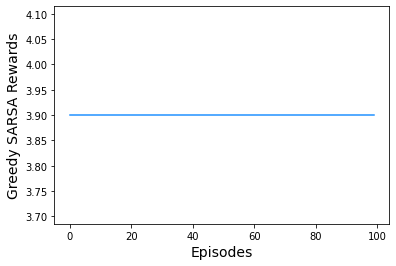

In [48]:
fig, ax = plt.subplots()
ax.plot(iter_idx, greedy_sarsa_rewards, color = "dodgerblue")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Greedy SARSA Rewards", color = "black", fontsize = 14)
plt.show()

## 1-4. Applying SARSA to solve the stochastic environment

In [77]:
repeats = 10
num_episodes = 100
report_every = 10
iter_idx = []
iter_idx2 = []
stoch_sarsa_rewards_cum = []
stoch_sarsa_rewards_avg = []
sarsa_decaying_eps = []
for e in range(9):
    empty = [0] * num_episodes
    stoch_sarsa_rewards_cum.append(empty)
    stoch_sarsa_rewards_avg.append([])
    sarsa_decaying_eps.append([])

# for hyperparameter tuning (gamma and decaying factor)
for l in range(repeats): # averaging 10 repeated trials
                         # to reduce variance of rewards
    
    stoch_sarsa_rewards = []
    for e in range(9):
        stoch_sarsa_rewards.append([])    
    
    count = 0
    for k in range(3):
        gamma = 0.99 - (k * 0.02)
        for j in range(3):
            # decay factor = (Final eps / Initial eps)^(1 / number of episodes)
            # decay factor = (0.01 / 1)^(1 / 100) = 0.955
            factor = 0.955 - (j * 0.02)
            
            sarsa_agent = SARSA(gamma = gamma,
                        num_states = env_stochastic.observation_space.n,
                        num_actions = env_stochastic.action_space.n,
                        eps = 1.0,
                        lr = 1e-1,
                        factor = factor)

            for i in range(num_episodes):

                reward_sum = 0
                env_stochastic.reset()    
                while True:
                    state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
                    action = sarsa_agent.get_action(state)
                    obs, reward, done, info = env_stochastic.step(action)
                    next_state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
                    next_action = sarsa_agent.get_action(next_state)

                    sarsa_agent.update_sample(state = state,
                                              action = action,
                                              reward = reward,
                                              next_state = next_state,
                                              next_action = next_action,
                                              done = done)
                    reward_sum += reward
                    if done:
                        break
                    
                stoch_sarsa_rewards[count].append(reward_sum)
                if l == 0:
                    sarsa_decaying_eps[count].append(sarsa_agent.eps)
                    if k + j == 0:
                        iter_idx.append(i)                

#                 if i % report_every == 0:
#                     print(f"Running {i} th episode for gamma {gamma} and factor {factor}")
#                     print(f"Reward sum : {reward_sum}")

            if l == 0:
                print(f"The {count + 1}th combination: gamma {gamma} and factor {factor}")
            count += 1
    
    for z in range(9):
        stoch_sarsa_rewards_cum[z] = [
            r_cum + r_new for r_cum, r_new in zip(stoch_sarsa_rewards_cum[z],
                                                  stoch_sarsa_rewards[z])
            ]

for y in range(9):
    stoch_sarsa_rewards_avg[y] = [x / repeats for x in stoch_sarsa_rewards_cum[y]]

The 1th combination: gamma 0.99 and factor 0.955
The 2th combination: gamma 0.99 and factor 0.9349999999999999
The 3th combination: gamma 0.99 and factor 0.9149999999999999
The 4th combination: gamma 0.97 and factor 0.955
The 5th combination: gamma 0.97 and factor 0.9349999999999999
The 6th combination: gamma 0.97 and factor 0.9149999999999999
The 7th combination: gamma 0.95 and factor 0.955
The 8th combination: gamma 0.95 and factor 0.9349999999999999
The 9th combination: gamma 0.95 and factor 0.9149999999999999


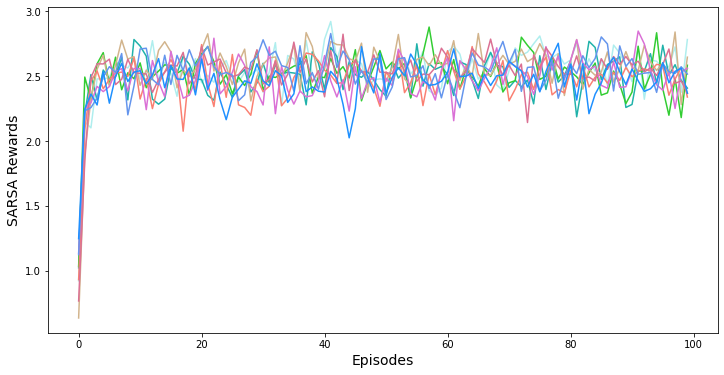

In [78]:
# Similar to the Q-learning case, for the stochastic environment,
# there does not seem to be significant differences among various settings.
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(iter_idx, stoch_sarsa_rewards_avg[0], color = "paleturquoise")
ax.plot(iter_idx, stoch_sarsa_rewards_avg[1], color = "lightseagreen")
ax.plot(iter_idx, stoch_sarsa_rewards_avg[2], color = "limegreen")
ax.plot(iter_idx, stoch_sarsa_rewards_avg[3], color = "tan")
ax.plot(iter_idx, stoch_sarsa_rewards_avg[4], color = "salmon")
ax.plot(iter_idx, stoch_sarsa_rewards_avg[5], color = "orchid")
ax.plot(iter_idx, stoch_sarsa_rewards_avg[6], color = "palevioletred")
ax.plot(iter_idx, stoch_sarsa_rewards_avg[7], color = "cornflowerblue")
ax.plot(iter_idx, stoch_sarsa_rewards_avg[8], color = "dodgerblue")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("SARSA Rewards", color = "black", fontsize = 14)
plt.show()

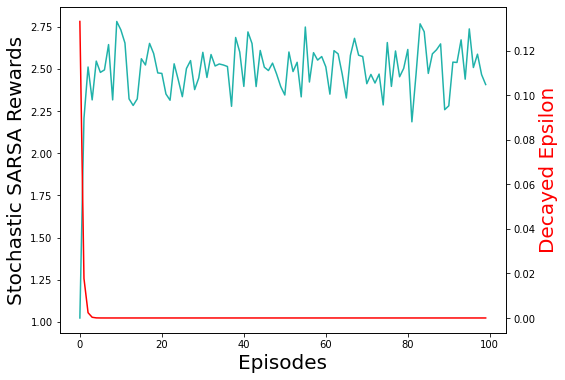

In [81]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(iter_idx, stoch_sarsa_rewards_avg[1], color = "lightseagreen")
ax2 = ax.twinx()
ax2.plot(iter_idx, sarsa_decaying_eps[1], color = "red")
ax.set_xlabel("Episodes", fontsize = 20)
ax.set_ylabel("Stochastic SARSA Rewards", color = "black", fontsize = 20)
ax2.set_ylabel("Decayed Epsilon", color = "red", fontsize = 20)
plt.show()

In [54]:
num_episode = 100
iter_idx = []
stoch_greedy_sarsa_rewards = []

stoch_greedy_sarsa_agent = GreedySARSA(gamma = gamma,
                                       num_states = env_stochastic.observation_space.n,
                                       num_actions = env_stochastic.action_space.n,
                                       lr = 1e-1)

for i in range(num_episodes):

    reward_sum = 0
    env_stochastic.reset()    
    while True:
        state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
        action = greedy_sarsa_agent.get_action(state)
        obs, reward, done, info = env_stochastic.step(action)
        next_state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
        next_action = greedy_sarsa_agent.get_action(next_state)

        greedy_sarsa_agent.update_sample(state = state,
                                         action = action,
                                         reward = reward,
                                         next_state = next_state,
                                         next_action = next_action,
                                         done = done)
        reward_sum += reward
        if done:
            break
                    
    stoch_greedy_sarsa_rewards.append(reward_sum)
    iter_idx.append(i)                

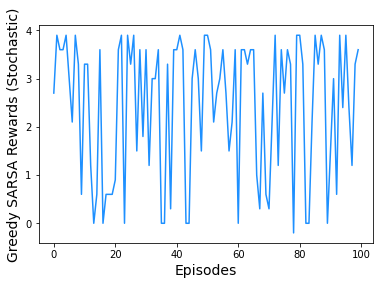

In [55]:
fig, ax = plt.subplots()
ax.plot(iter_idx, stoch_greedy_sarsa_rewards, color = "dodgerblue")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Greedy SARSA Rewards (Stochastic)", color = "black", fontsize = 14)
plt.show()

## 2. Comparing the performance of both algorithms on the same deterministic environment

In [56]:
# I used 'repeated' = 100 for precise comparison.
# However, for the purpose of examination, 'repeated' = 10 would be enough.
repeats = 10
num_episodes = 100
#log_every = 100

### Q-learning

In [57]:
# setting hyperparameters and iterations (using the best setting above)
num_states = env.observation_space.n
num_actions = env.action_space.n
gamma = 0.97
lr = 1e-1
factor = 0.955
iter_idx = []
qlearning_rewards_cum = [0] * num_episodes
qlearning_decaying_eps = []

for j in range(repeats):
    
    eps = 1.0
    qlearning_rewards_new = []
    qlearning_agent = QLearner(gamma = gamma,
                    num_states = env.observation_space.n,
                    num_actions = env.action_space.n,
                    eps = eps,
                    lr = lr,
                    factor = factor)

    for i in range(num_episodes):

        reward_sum = 0
        env.reset()    
        while True:
            state = env.agent_pos[0] * 4 + env.agent_pos[1]
            action = qlearning_agent.get_action(state)
            obs, reward, done, info = env.step(action)
            next_state = env.agent_pos[0] * 4 + env.agent_pos[1]

            qlearning_agent.update_sample(state = state,
                                          action = action,
                                          reward = reward,
                                          next_state = next_state,
                                          done = done)
            reward_sum += reward
            if done:
                break

        qlearning_rewards_new.append(reward_sum)
        
        if j == 0:
            iter_idx.append(i)
            qlearning_decaying_eps.append(qlearning_agent.eps)
            
    qlearning_rewards_cum = [
        r_cum + r_new for r_cum, r_new in zip(qlearning_rewards_cum,
                                              qlearning_rewards_new)]
#     print(f"Start to run the {j}th experiment...")

qlearning_rewards_avg = [x / repeats for x in qlearning_rewards_cum]

### SARSA

In [58]:
# setting hyperparameters and iterations (using the best setting above)
num_states = env.observation_space.n
num_actions = env.action_space.n
gamma = 0.95
lr = 1e-1
factor = 0.955
iter_idx = []
sarsa_rewards_cum = [0] * num_episodes
sarsa_decaying_eps = []

for j in range(repeats):
    
    eps = 1.0
    sarsa_rewards_new = []
    sarsa_agent = SARSA(gamma = gamma,
                    num_states = env.observation_space.n,
                    num_actions = env.action_space.n,
                    eps = eps,
                    lr = lr,
                    factor = factor)

    for i in range(num_episodes):

        reward_sum = 0
        env.reset()    
        while True:
            state = env.agent_pos[0] * 4 + env.agent_pos[1]
            action = sarsa_agent.get_action(state)
            obs, reward, done, info = env.step(action)
            next_state = env.agent_pos[0] * 4 + env.agent_pos[1]
            next_action = sarsa_agent.get_action(next_state)

            sarsa_agent.update_sample(state = state,
                                      action = action,
                                      reward = reward,
                                      next_state = next_state,
                                      next_action = next_action,
                                      done = done)
            reward_sum += reward
            if done:
                break

        sarsa_rewards_new.append(reward_sum)
        
        if j == 0:
            iter_idx.append(i)
            sarsa_decaying_eps.append(sarsa_agent.eps)
            
    sarsa_rewards_cum = [
        r_cum + r_new for r_cum, r_new in zip(sarsa_rewards_cum,
                                              sarsa_rewards_new)]
#     print(f"Start to run the {j}th experiment...")

sarsa_rewards_avg = [x / repeats for x in sarsa_rewards_cum]

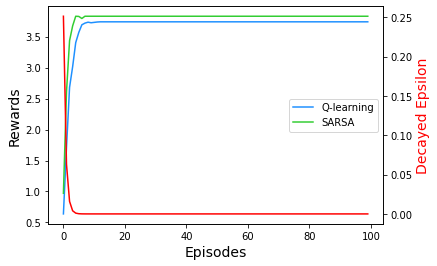

In [62]:
fig, ax = plt.subplots()
ax.plot(iter_idx, qlearning_rewards_avg,
        color = 'dodgerblue')
ax.plot(iter_idx, sarsa_rewards_avg,
        color = 'limegreen')
ax2 = ax.twinx()
ax2.plot(iter_idx, sarsa_decaying_eps, color = "red")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Rewards", color = "black", fontsize = 14)
ax2.set_ylabel("Decayed Epsilon", color = "red", fontsize = 14)
ax.legend(['Q-learning', 'SARSA'], loc = 'center right')
plt.show()

## 3. Comparing the performance of both algorithms on the same stochastic environment

### Q-learning

In [63]:
# setting hyperparameters and iterations (using the best setting above)
num_states = env.observation_space.n
num_actions = env.action_space.n
gamma = 0.99
lr = 1e-1
factor = 0.955
iter_idx = []
stoch_qlearning_rewards_cum = [0] * num_episodes
qlearning_decaying_eps = []

for j in range(repeats):
    
    eps = 1.0
    stoch_qlearning_rewards_new = []
    qlearning_agent = QLearner(gamma = gamma,
                    num_states = env_stochastic.observation_space.n,
                    num_actions = env_stochastic.action_space.n,
                    eps = eps,
                    lr = lr,
                    factor = factor)

    for i in range(num_episodes):

        reward_sum = 0
        env_stochastic.reset()    
        while True:
            state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
            action = qlearning_agent.get_action(state)
            obs, reward, done, info = env_stochastic.step(action)
            next_state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]

            qlearning_agent.update_sample(state = state,
                                          action = action,
                                          reward = reward,
                                          next_state = next_state,
                                          done = done)
            reward_sum += reward
            if done:
                break

        stoch_qlearning_rewards_new.append(reward_sum)
        
        if j == 0:
            iter_idx.append(i)
            qlearning_decaying_eps.append(qlearning_agent.eps)
            
    stoch_qlearning_rewards_cum = [
        r_cum + r_new for r_cum, r_new in zip(stoch_qlearning_rewards_cum,
                                              stoch_qlearning_rewards_new)]
#     print(f"Start to run the {j}th experiment...")

stoch_qlearning_rewards_avg = [x / repeats for x in stoch_qlearning_rewards_cum]

### SARSA

In [64]:
# setting hyperparameters and iterations (using the best setting above)
num_states = env.observation_space.n
num_actions = env.action_space.n
gamma = 0.99
lr = 1e-1
factor = 0.955
iter_idx = []
stoch_sarsa_rewards_cum = [0] * num_episodes
sarsa_decaying_eps = []

for j in range(repeats):
    
    eps = 1.0
    stoch_sarsa_rewards_new = []
    sarsa_agent = SARSA(gamma = gamma,
                    num_states = env_stochastic.observation_space.n,
                    num_actions = env_stochastic.action_space.n,
                    eps = eps,
                    lr = lr,
                    factor = factor)

    for i in range(num_episodes):

        reward_sum = 0
        env_stochastic.reset()    
        while True:
            state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
            action = sarsa_agent.get_action(state)
            obs, reward, done, info = env_stochastic.step(action)
            next_state = env_stochastic.agent_pos[0] * 4 + env_stochastic.agent_pos[1]
            next_action = sarsa_agent.get_action(next_state)

            sarsa_agent.update_sample(state = state,
                                      action = action,
                                      reward = reward,
                                      next_state = next_state,
                                      next_action = next_action,
                                      done = done)
            reward_sum += reward
            if done:
                break

        stoch_sarsa_rewards_new.append(reward_sum)
        
        if j == 0:
            iter_idx.append(i)
            sarsa_decaying_eps.append(sarsa_agent.eps)
            
    stoch_sarsa_rewards_cum = [
        r_cum + r_new for r_cum, r_new in zip(stoch_sarsa_rewards_cum,
                                              stoch_sarsa_rewards_new)]
#     print(f"Start to run the {j}th experiment...")

stoch_sarsa_rewards_avg = [x / repeats for x in stoch_sarsa_rewards_cum]

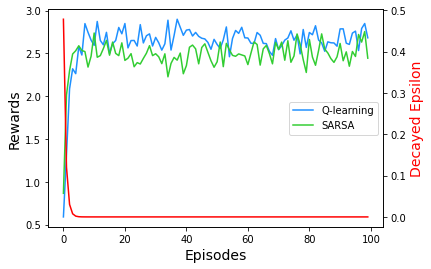

In [65]:
fig, ax = plt.subplots()
ax.plot(iter_idx, stoch_qlearning_rewards_avg,
        color = 'dodgerblue')
ax.plot(iter_idx, stoch_sarsa_rewards_avg,
        color = 'limegreen')
ax2 = ax.twinx()
ax2.plot(iter_idx, sarsa_decaying_eps, color = "red")
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Rewards", color = "black", fontsize = 14)
ax2.set_ylabel("Decayed Epsilon", color = "red", fontsize = 14)
ax.legend(['Q-learning', 'SARSA'], loc = 'center right')
plt.show()

## 4. Briefly explain the tabular methods, including Q-learning, that were used to solve the problems. Provide their update functions and key features.

The answer is in the pdf report submitted together.